# Atividade 4

In [1]:
import random, time, itertools

import numpy as np
import matplotlib.pyplot as plt

from deap import base, algorithms, tools, creator


## Definições

In [2]:
alltours = itertools.permutations

City = complex

In [3]:
def distance(A, B):
    return abs(A - B)

In [4]:
def generate_cities(n):
    return set(
        City(random.randrange(1, 1000), random.randrange(1, 1000)) for _ in range(n)
    )


In [5]:
def total_distance(tour):
    return sum(distance(tour[i], tour[i - 1]) for i in range(len(tour)))


In [6]:
def TSP(cities):
    return min(alltours(cities), key=total_distance)


In [7]:
def plot_tour(tour):
    tourX, tourY = [p.real for p in tour],[p.imag for p in tour]
    tourX = tourX + [tourX[0]]
    tourY = tourY + [tourY[0]]
    plt.plot(tourX, tourY, 'bo-')
    plt.plot([tourX[0]], [tourY[0]], 'gD', markersize=12)
    plt.show()

In [8]:
cities10 = generate_cities(10)
cities10

{(21+634j),
 (227+184j),
 (291+483j),
 (492+751j),
 (525+466j),
 (600+229j),
 (790+711j),
 (833+563j),
 (878+729j),
 (926+304j)}

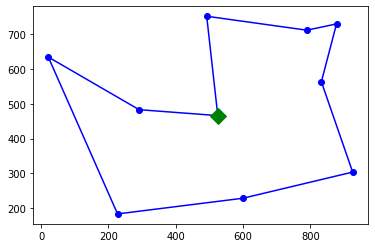

In [9]:
tour = TSP(cities10)
plot_tour(tour)

In [10]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [11]:
num_cities = 30
cities = generate_cities(num_cities)
toolbox = base.Toolbox()
toolbox.register("indices", np.random.permutation, num_cities)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [12]:
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.register("mate", tools.cxOrdered)

In [13]:
def index_to_cities(individual: toolbox.individual) -> list:
    return [list(cities)[e] for e in individual]


def evaluation(individual: toolbox.individual) -> tuple[float, None]:
    return (total_distance(index_to_cities(individual)),)


In [14]:
toolbox.register("evaluate", evaluation)
toolbox.register("select", tools.selTournament, tournsize=3)

## 1. Comparação `TSP_greedy()`

In [15]:
def nearest(cities, C):
    return min(cities, key=lambda x: distance(x, C))

def TSP_greedy(cities):
    start = list(cities)[0]
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest(unvisited, tour[-1])
        tour.append(C)
        unvisited.remove(C)
    return tour

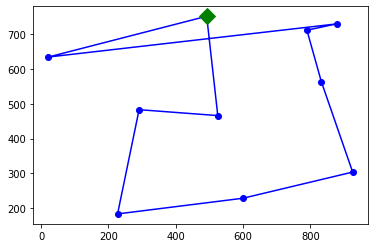

In [16]:
plot_tour(TSP_greedy(cities10))

In [17]:
import time

greedy_time = []
greedy_distances = []

ea_time = []
ea_distances = []

for i in range(1000):
    start = time.time()
    t = TSP_greedy(cities)
    stop = time.time()
    greedy_distances.append(total_distance(t))
    greedy_time.append(stop - start)
    
    pop = toolbox.population(n=100)
    start = time.time()
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=300, verbose=False)
    stop = time.time()
    best = tools.selBest(result, k=1)[0]
    ea_time.append(stop - start)
    ea_distances.append(total_distance(index_to_cities(best)))

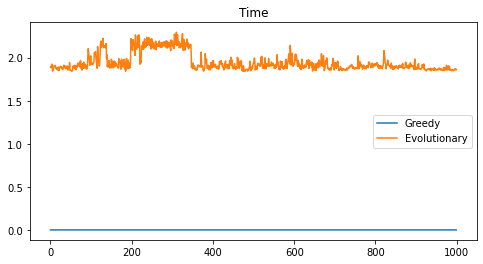

In [18]:
plt.figure(figsize=(8,4))
plt.title("Time")
plt.ylabel("Tempo")
plt.xlabel("Iteração")
plt.plot(greedy_time)
plt.plot(ea_time)
plt.legend(["Greedy", "Evolutionary"])
plt.show()

In [19]:
print("TIME")
print("    \tgreedy\t\tevolutionary")
print(f"min:\t{np.min(greedy_time):.4f}\t\t{np.min(ea_time):.4f}")
print(f"max:\t{np.max(greedy_time):.4f}\t\t{np.max(ea_time):.4f}")
print(f"mean:\t{np.mean(greedy_time):.4f}\t\t{np.mean(ea_time):.4f}")
print(f"std :\t{np.std(greedy_time):.4f}\t\t{np.std(ea_time):.4f}")

TIME
    	greedy		evolutionary
min:	0.0001		1.8408
max:	0.0002		2.2942
mean:	0.0001		1.9452
std :	0.0000		0.1033


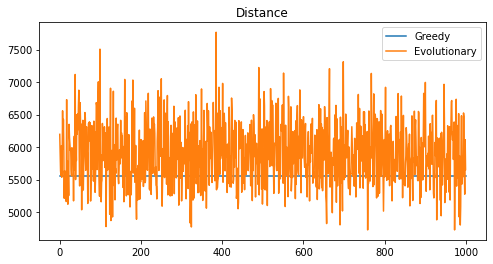

In [20]:
plt.figure(figsize=(8,4))
plt.title("Distance")
plt.ylabel("Distancia")
plt.xlabel("Iteração")
plt.plot(greedy_distances)
plt.plot(ea_distances)
plt.legend(["Greedy", "Evolutionary"])
plt.show()

In [21]:
print("DISTANCE")
print("    \tgreedy\t\tevolutionary")
print(f"min:\t{np.min(greedy_distances):.4f}\t{np.min(ea_distances):.4f}")
print(f"max:\t{np.max(greedy_distances):.4f}\t{np.max(ea_distances):.4f}")
print(f"mean:\t{np.mean(greedy_distances):.4f}\t{np.mean(ea_distances):.4f}")
print(f"std :\t{np.std(greedy_distances):.4f}\t\t{np.std(ea_distances):.4f}")

DISTANCE
    	greedy		evolutionary
min:	5555.2833	4725.2556
max:	5555.2833	7765.6222
mean:	5555.2833	5902.4722
std :	0.0000		463.4545


## 2. Tamanho da população

In [22]:
population = [i for i in range(100, 2001, 100)]

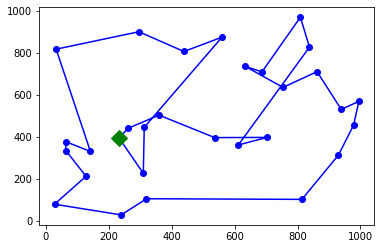

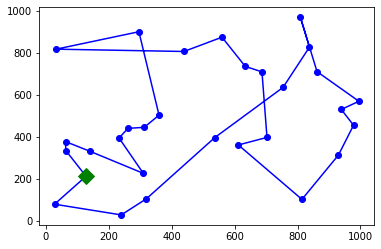

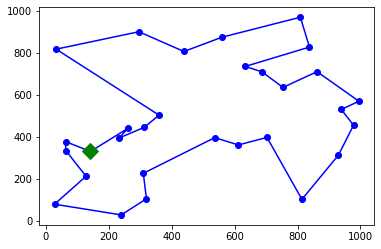

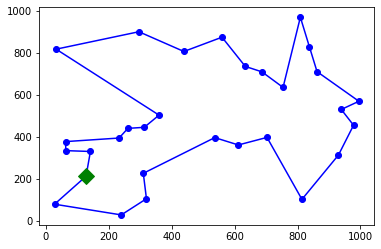

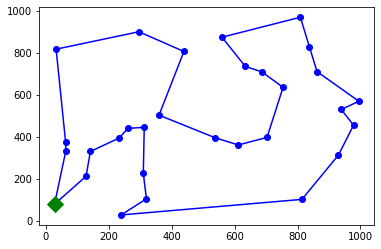

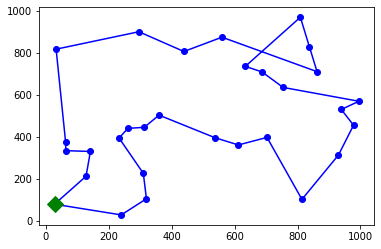

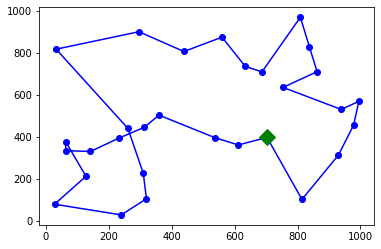

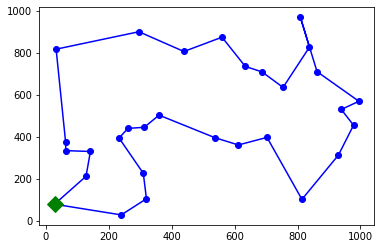

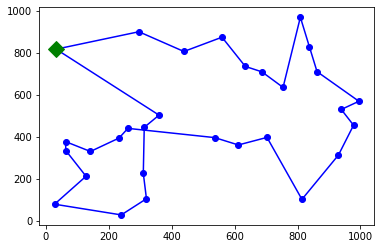

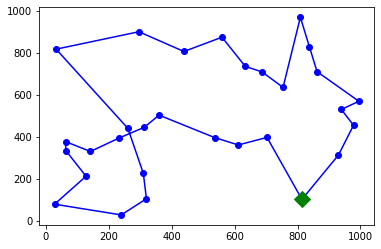

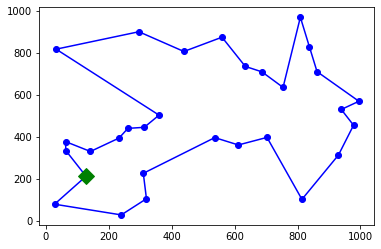

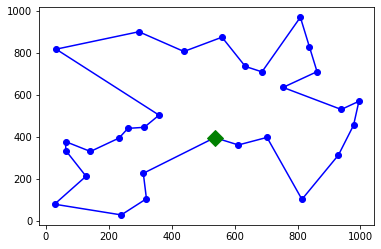

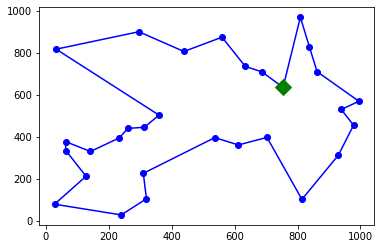

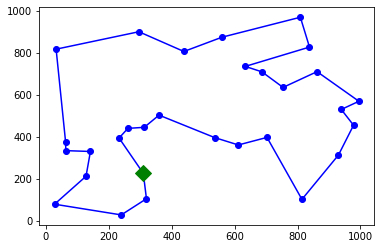

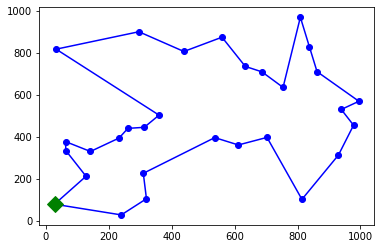

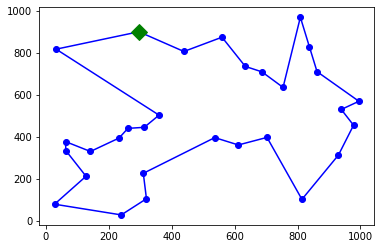

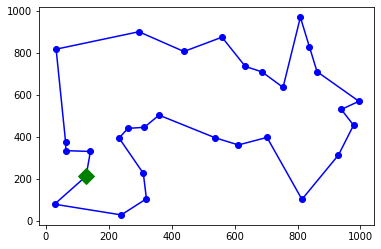

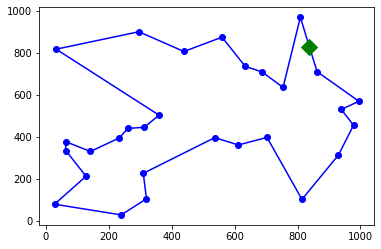

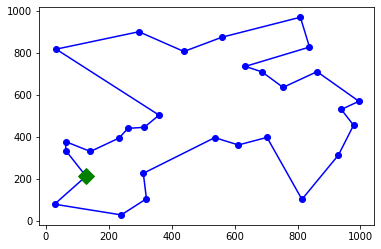

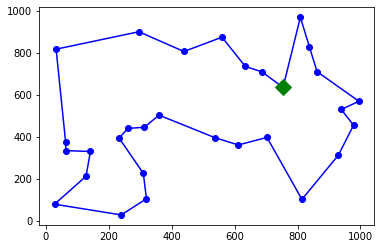

In [23]:
pop_value = [0 for _ in range(len(population))]
for i in range(len(population)):
    pop = toolbox.population(n=population[i])
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=300, verbose=False)
    best = tools.selBest(result, k=1)[0]
    pop_value[i] = total_distance(index_to_cities(best))
    plot_tour(index_to_cities(best))

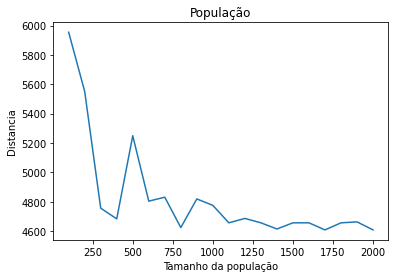

In [24]:
plt.figure(figsize=(6,4))
plt.title("População")
plt.xticks(np.arange(100, 2001, 200))
plt.xlabel("Tamanho da população")
plt.ylabel("Distancia")
plt.plot(population, pop_value)

## 3. Probabilidade Mutação e Crossover

In [25]:
mutpbs = [i for i in np.arange(0, 1, 0.05)]
cxpbs = [i for i in np.arange(0, 1, 0.05)]

In [26]:
cx_values = [0 for _ in range(len(cxpbs))]
pop = toolbox.population(n=500)
for i in range(len(cxpbs)):
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpbs[i], mutpb=0.2, ngen=300, verbose=False)
    best = tools.selBest(result, k=1)[0]
    cx_values[i] = total_distance(index_to_cities(best))

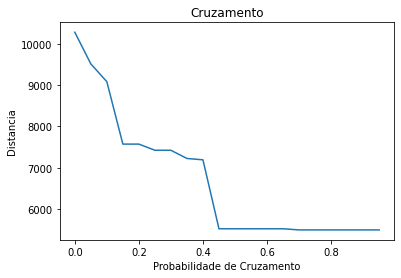

In [27]:
plt.figure(figsize=(6,4))
plt.xticks(np.arange(0, 1, 0.1))
plt.title("Cruzamento")
plt.xlabel("Probabilidade de Cruzamento")
plt.ylabel("Distancia")
plt.plot(cxpbs, cx_values)

In [28]:
mut_values = [0 for _ in range((len(mutpbs)))]

pop = toolbox.population(n=500)
for i in range(len(mutpbs)):
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=mutpbs[i], ngen=300, verbose=False)
    best = tools.selBest(result, k=1)[0]
    mut_values[i] = total_distance(index_to_cities(best))

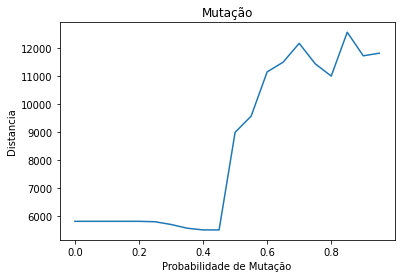

In [29]:
plt.figure(figsize=(6,4))
plt.xticks(np.arange(0, 1, 0.1))
plt.title("Mutação")
plt.xlabel("Probabilidade de Mutação")
plt.ylabel("Distancia")
plt.plot(mutpbs, mut_values)